<a href="https://colab.research.google.com/github/NatnaelMengistu1/DS/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import multivariate_normal as mvn

## Data Input

In [31]:
import io
data = pd.read_csv("/content/drive/MyDrive/MNIST_train.csv")
data.head()

# Dataset is now stored in a Pandas Dataframe

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.drop(['Unnamed: 0', 'index'], inplace=True, axis=1)


In [33]:
data

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data.describe()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [35]:
X = data.to_numpy()

In [36]:
X

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [10]:
X[:,0]


array([5, 0, 4, ..., 5, 6, 8])

In [37]:
y = X[:,0]
y

array([5, 0, 4, ..., 5, 6, 8])

In [12]:
y.shape

(60000,)

In [38]:
  X = X[:,1:]
  X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
X.shape

(60000, 784)

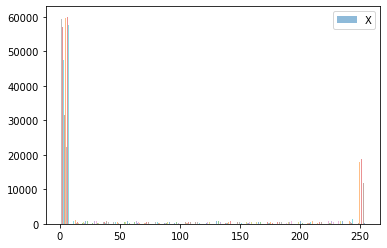

In [16]:
plt.figure()
plt.hist(X, label = "X", alpha = 0.5 , bins = 30)
plt.legend()

## Naive Bayes Classifier

In [39]:
class GaussNB():
  #self is a variable that gives value to every method in the class

  def fit(self ,X ,y ,epsilon = 1e-3):
    self.likelyhoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[ y==k , :]
      self.likelyhoods[k] = {"mean" : X_k.mean(axis = 0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k) / len(X)



  def predict(self, X):

    N , d = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelyhoods.items():
      #Bayes Theorem computation
      P_hat[:,k] = mvn.logpdf(X, l["mean"] , l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)



In [40]:
def accuracy(y , y_hat):
  return np.mean(y==y_hat)

In [41]:
gnb = GaussNB()

In [42]:
gnb.fit(X,y)

Test1.drop(['Unnamed: 0', 'index'], inplace=True, axis=1)


In [43]:
Test1 = pd.read_csv("/content/drive/MyDrive/MNIST_test (1).csv")

In [44]:
Test1.drop(['Unnamed: 0', 'index'], inplace=True, axis=1)
Test1

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
test1 = Test1.to_numpy()

In [46]:
X1 = test1[:,1:]
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
Y1 = test1[:,0]

In [50]:
y_hat = gnb.predict(X1)

In [51]:
#Training Accuracy
accuracy(Y1 , y_hat)

0.5878

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,-1], c = y , alpha = 0.55 , s=10)
plt.scatter(X[:,0], X[:,-1], c = y_hat , alpha = 0.55 , s=10)

In [ ]:
def coinflip(y):
  y_hat = np.zeros(len(y))
  for i in range(len(y)):
    flip = np.random.randn(1)
    if flip > 0:
      y_hat[1]=1


  return y_hat


In [ ]:
y_hat = coinflip(y)

In [ ]:
accuracy(y,y_hat)

## Non Naive Gauss Bayes Classifier

In [ ]:
from numpy.core import multiarray

'''
class GaussBayes():
  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods= dict()
    self.priors = dict()

    # K - classes in this case
    self.K= set(y.astype(int))

    for k in self.K:
      X_k = X[y==k, :]
      N_k , D = X_k.shape
      mu_k = X_k.mean(axis = 0)
      self.likelihoods[k] = {"mean": X_k.mean(axis = 0), "cov" : (1/(N_k-1))*np.matmul((X_k - mu_k).T, X_k-mu_k) + epsilon*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
     N , D =  X.shape
     p_hat = np.zeros((N, len(self.K)))

     for k,l in self.likelihoods.items():
       p_hat[:,k] = mvn.logpdf(X , l["mean"], l["cov"]) + np.log(self.priors[k])
       
       
       return p_hat.argmax(axis=1)
'''

class GaussBayes():

  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors =dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y==k,:]
      N_k,D = X_k.shape
      mu_k =X_k.mean(axis=0)
      self.likelihoods[k] = {"mean":X_k.mean(axis=0),
                             "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self, X):

    N, D  = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k , l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"])+np.log(self.priors[k])


    return P_hat.argmax(axis=1)


In [ ]:
X.shape

In [ ]:
gbayes = GaussBayes()

In [ ]:
gbayes.fit(X , y)

#y2

In [ ]:
y

In [ ]:
y_hat2 = gbayes.predict(X)
set(y_hat2)

In [ ]:
accuracy(y, y_hat2)

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c= y_hat2, alpha = 0.25)


## KNN Classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def accuracy(y , y_hat):
  return np.mean(y==y_hat)

### Synthetic Dataset generation

In [ ]:
D = 2
C = 3 #number of classes
N = int(C*1e3)  #NUMBER OF OBESERVATION

x0 = np.random.randn((N//C),D)+np.array([2,2])
x1 = np.random.randn((N//C),D)+np.array([0,-2])
x2 = np.random.randn((N//C),D)+np.array([-2,2])

X = np.vstack((x0,x1,x2))
y = np.array([0]*(N//C)+[1]*(N//C)+[2]*(N//C))




In [ ]:
np.array([3]*5)

In [ ]:
y

In [ ]:
y.shape

In [ ]:
X.shape

In [ ]:
plt.figure()
plt.scatter(X[:,0] , X[:,1], c=y , alpha=0.5 , s=6)

In [ ]:
np.argmax([1,34,12])

In [ ]:
np.argsort([1,34,12])

In [ ]:
'''
class KNNclassifier():
  def fit(self , X ,y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      distance2 = np.sum((self.X - X[i])**2, axis=1)
      #sorted idices 
      idxt = np.argsort(distance2)[:K]
      gamma_k = 1/(np.sqrt(distance2[idxt] + epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()


      return y_hat
'''
class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y


  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idxt  = np.argsort(dist2)[:K]
      gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()


    return y_hat





In [ ]:
np.bincount([0,1,1,2], weights=[(1/2 ),(1/7),(1/6),(1/9)])

In [ ]:
knn = KNNClassifier()

In [ ]:
knn.fit(X,y)

In [ ]:
data1 = pd.read_csv("/content/drive/MyDrive/MNIST_test (1).csv")

In [ ]:
data1.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data1.drop(['Unnamed: 0', 'index'], inplace=True, axis=1)

In [ ]:
data1

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = data1.to_numpy()

In [ ]:
y = test[:, 0]

In [ ]:
X = test[:,1:]
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_hat = knn.predict(X,10)

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_hat , alpha = 0.5 , s=6)

In [ ]:
accuracy(y,y_hat)

0.9684

In [ ]:
X_vis = np.random.uniform(-6,6,(int(N*10),D))

In [ ]:
y_hat_vis = knn.predict(X_vis , 20)
plt.figure()
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_hat_vis , alpha = 0.5 , s= 6)